In [1]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Change directory to your drive, and clone the code for SampleVAE to your drive
# You need to run this cell only once. Since it's in your drive, the files should stay there even if you close the window or restart your runtime
% cd /content/drive/My Drive
! git clone https://github.com/maxfrenzel/SampleVAE.git

/content/drive/My Drive
Cloning into 'SampleVAE'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 201 (delta 10), reused 15 (delta 6), pack-reused 173
Receiving objects: 100% (201/201), 134.39 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Checking out files: 100% (39/39), done.


In [1]:
# Change to the directory containing SampleVAE
% cd /content/drive/My Drive/SampleVAE

/content/drive/My Drive/SampleVAE


In [4]:
# Install the requirements. You have to do this if you start a completely new session, but not if you simply restart the runtum
! pip install -r requirements.txt

     |████████████████████████████████| 286kB 8.8MB/s 
     |████████████████████████████████| 25.2MB 93kB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 1.6MB 56.0MB/s 
     |████████████████████████████████| 92.6MB 74kB/s 
     |████████████████████████████████| 17.3MB 143kB/s 
     |████████████████████████████████| 3.6MB 47.9MB/s 
     |████████████████████████████████| 368kB 57.1MB/s 
     |████████████████████████████████| 3.2MB 57.0MB/s 
  Created wheel for librosa: filename=librosa-0.7.1-cp36-none-any.whl size=1610157 sha256=6498540225b4a634cc9d87362b7f5c8102b28f95741d55ad626c416d23e23ec6
  Stored in directory: /root/.cache/pip/wheels/07/36/47/a9a4d151332cbdaec564500af9704a0ad862cf554dcf4bfda0
Successfully built librosa
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which i

In [0]:
# Now we can import all the necessary modules
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [0]:
# Let's define a function for easy visualization of audio files
def visualize_audio(audio_file):
    # Waveform
    x, sr = librosa.load(audio_file, duration=2.0)
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)
    plt.xlim([0,2.0])
    
    # Spectrogram
    sr = tool.param['SAMPLING_RATE']
    N_FFT = tool.param['N_FFT']
    HOP_LENGTH = tool.param['HOP_LENGTH']
    spec = np.squeeze(tool.get_features(audio_file))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
    
    ipd.display(ipd.Audio(audio_file))

# And a function to just give us the audio
def show_audio(audio_file):
    ipd.display(ipd.Audio(audio_file))

%matplotlib inline

In [0]:
# And import the tool class

# The first time you run this after cloning the SampleVAE code, you have to go into the SampleVAE directory in your drive,
# open util.py, and delete the fourth line say mpl.use('TkAgg'). Make sure to save the file.
# Once you've mde this change, you can run this cell.

from tool_class import *

In [5]:
# Let's create a tool

# You have several options here. 

# First you need to choose the model. The pretrained models are
# - model_drum_classes [Trained on 10k drum one shots, with a classifier of 9 drum classes]
# - model_drum_machines [Trained on 4k drum one shots, with a classifier of 71 drum machines]
# - model_general [Trained on 60k samples of all kinds of types. No classifier. This is the data I used for NeuralFunk.]
# Later we will also cover how you can train your own model.

# You can also specify a library directory here if you want to search for similar samples.
# For that, you first need to upload the directory to your drive.
# The model will look through all sub-directories, so if your samples are in many nested directories, that's fine.
# In my case, I copied a directory with about 400 drum samples to /content/drive/My Drive/Samples
# If you have a large library, the first time you create a tool with specific model and library it will take a while, 
# since all your samples have to be encoded. These get saved, so the next time your run a model on the same library it should be faster.
# If you do not want to do similarity search, simply remove the part that says library_dir='...' below.

# One more note: You can only run this line once per runtime (for some reasons to do with TensorFlow)
# If you want to create a new tool (e.g. to change model or library directory), you need to restart your runtime.

# In the following line I generate a tool based on the model model_drum_classes, and my small library directory.
tool = SoundSampleTool(logdir='model_drum_classes', 
                       library_dir='/content/drive/My Drive/Samples',
                       library_segmentation=False)

Loading existing parameters.
model_drum_classes/params.json
Creating model.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Model created.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Setting up session.
Session set up.
Trying to restore saved checkpoints from model_drum_classes ...  Checkpoint found: model_drum_classes/model.ckpt-2603
  Global step was: 2603
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model_drum_classes/model.ckpt-2603
 Done.
Constructing library based on directory /content/drive/My Drive/Samples.
Total number of samples found in library: 351
Feature root direc

In [13]:
# If you did create your tool with a library directory, you can do similarity search as follows. Otherwise skip this example

# Just run the following code, replacing the text after target_file with a path to your own target file.
# By changing the number after num_similar, you can change how many similar files you want to look for
similar_files, onsets, distances = tool.find_similar(target_file='/content/drive/My Drive/Samples/Drums/Kick/Kick Atomized 1.wav', 
                                                     num_similar=5,
                                                     display=True)

# The function above returned three variables. similar_files contains a list of paths to the similar files. You can ignore the others for now.
# If you want to do more complicted things from here (and know some coding), you can use that list for downstream tasks.
# Otherwise you can just use the file list that was printed below.

# Let's display the audio files here so we can listen to them.
for file in similar_files:
    show_audio(file)

5 most similar samples to /content/drive/My Drive/Samples/Drums/Kick/Kick Atomized 1.wav:
1 - /content/drive/My Drive/Samples/Drums/Kick/Kick Atomized 1.wav at 0.0 (dist = 0.0)
2 - /content/drive/My Drive/Samples/Drums/Kick/Kick Eclipse 1.wav at 0.0 (dist = 1.33685302734375)
3 - /content/drive/My Drive/Samples/Drums/Kick/Kick Pressure 2.wav at 0.0 (dist = 1.3538203239440918)
4 - /content/drive/My Drive/Samples/Drums/Kick/Kick Falling 1.wav at 0.0 (dist = 1.4548546075820923)
5 - /content/drive/My Drive/Samples/Drums/Kick/Kick Forsaken 2.wav at 0.0 (dist = 1.4744771718978882)



In [15]:
# The model I loaded, model_drum_classes also has a classifier. To see what classes it has, we can look at this:
print(tool.class_names)

['0_kick', '1_snare', '2_hihat_closed', '3_hihat_open', '4_tom_low', '5_tom_mid', '6_tom_high', '7_clap', '8_rim']


In [14]:
# We can run the classifier as follows. Again, change the path after input_audio to your own file.
probabilities, most_likely_class = tool.predict(input_audio='/content/drive/My Drive/Samples/Drums/Kick/Kick Damnation 1.wav')

# This saves the probabilities of the classifier to probabilities (in the same order as in tool.class_names) 
# most_likely_class contains the index of the most likely class
# Again, if you know how to, you can use these variables for downstream tasks. Otherwise just read of the results from below.

# The following lines just print the results from above on screen
print('Most likely class: ', most_likely_class)
for k, c_name in enumerate(tool.class_names):
    print(f'Probability of {c_name}: {probabilities[k]}')

Most likely class:  0_kick
Probability of 0_kick: 0.9904540777206421
Probability of 1_snare: 0.00011080377589678392
Probability of 2_hihat_closed: 0.00018283147073816508
Probability of 3_hihat_open: 5.548656918108463e-05
Probability of 4_tom_low: 0.006015421822667122
Probability of 5_tom_mid: 0.0020266775973141193
Probability of 6_tom_high: 0.000984736136160791
Probability of 7_clap: 4.505020478973165e-05
Probability of 8_rim: 0.00012496330600697547


No input file given; sampling random point in latent space.
Decoding averaged embedding.
Reconstructing audio.


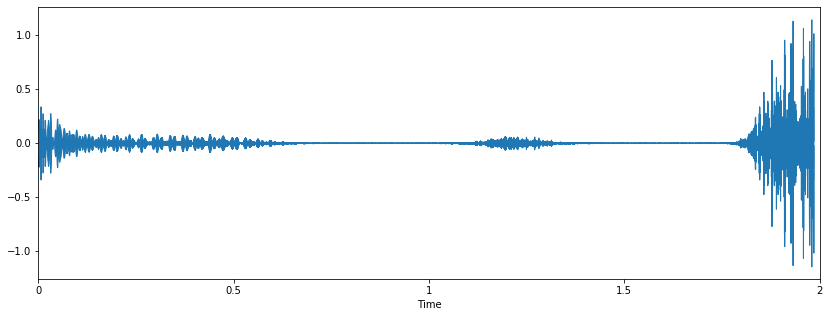

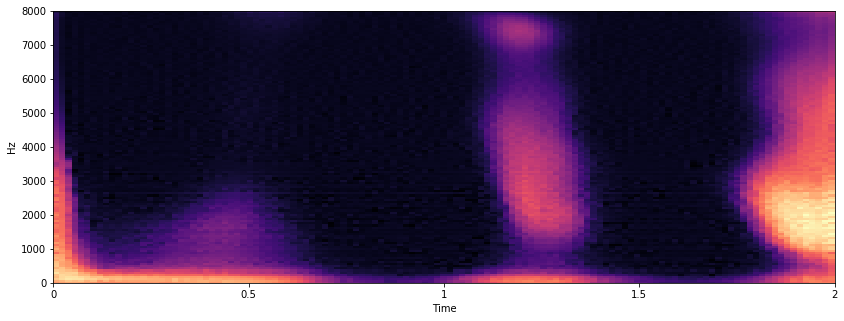

In [19]:
# Now let's look at audio generation. The function to do this is tool.generate

# The required argument is out_file, which tells the tool where you want to save the file (i.e. the filename)

# audio_files is a list of input files. If you pass an empty list [] it will sample a random point in latent space.
# If you pass a list of file paths ['file1', 'file2', ...] it will combine these files

# Weights is a list that controls how you want to combine the files. It should have the same number of elements as audio_files

# If normalize_weights is True (the default), you weights will be changhed so they sum to one. 
# To do things like negative weights (subtracting one sound from another), set this to False

# Finally, variance adds some randomness to the combined embedding before decoding.
# The larger this value, the more variation you will get.

# Run the generation
tool.generate(out_file='generated.wav',
              audio_files=[],
              weights=[],
              normalize_weights=True,
              variance=0.0)

# Let's load and display the audio we just generated
visualize_audio('generated.wav')

In [20]:
# Finally, let's look at training your own model. 
# In practice, you'll want a rairly large dataset for this. But let's keep it small for now to have everything run fast

# First, you'll have to create your dataset.
# There are two ways to do this: with classifier or without.

# Without classifier simply, run the following line 
# (after replacing the path after --data_dir with a directory conatining all the samples you want to train on)
# You can also give your dataset a name by changing what's after --dataset_name. 
# I called mine my_dataset here, but you migth want something more descriptive.
! python make_dataset.py --data_dir '/content/drive/My Drive/Samples' --dataset_name my_dataset

Total number of samples found: 353
Splitting 353 samples into 317 training and 36 validation samples.
Saving dataset files.
Done.


In [23]:
# If you want a dataset with classifier, you first need to make sure that your dataset directory has sub-directories with the classes you want.
# E.g. if you want a cat/dog classifier, the directory after --data_dir should have a folder called "cat" (with all the cat sounds), and "dog" with all the dog sounds.
# The dataset will have as many classess as there are directories in in data_dir.
# The more examples you have per class, the better the results, but for now let's keep it small too get some quick results
# Once you have prepared that, run the following code (again setting your own path and dataset name)
! python make_dataset_classifier.py --data_dir '/content/drive/My Drive/Samples/Drums' --dataset_name my_classifier_dataset

Total number of samples found: 353
Splitting 353 samples into 317 training and 36 validation samples.
Saving dataset files.
Done.


In [28]:
# Not that you've prepared a dataset (with or without classifier), we can train the model.

# To do this, run the following code. 
# After --dataset you want to specify the name of your dataset you want to train on
# The part after --logdir gives a name to your model (just like e.g. model_drum_classes).
! python train.py --logdir model_test --dataset my_classifier_dataset

Loading existing parameters.
model_test/params.json
Loading dataset.
Found matching feature directory: ./features/features_1573714339.
100% 317/317 [00:00<00:00, 5472.17it/s]
Features complete.
Generating data index.
100% 317/317 [00:00<00:00, 699.73it/s]
Total amount of data:  317
Feature length:  125
Loading dataset.
Found matching feature directory: ./features/features_1573714339.
100% 36/36 [00:00<00:00, 5941.41it/s]
Features complete.
Generating data index.
100% 36/36 [00:00<00:00, 698.82it/s]
Total amount of data:  36
Num classes:  [9]
Instructions for updating:
Use tf.cast instead.
Creating model.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Model created.
Setting up loss.
Instructions for updating:
Please use `rate` ins

In [0]:
# Once you have trained a model (either let the code above finish completely, or stop it early), you can restart your runtime
# and create a tool with your newly trained model